# Contents:
This notebook has two sections.
- Distribution Functions
- Specific Heat
References

To learn more about each of the functions and libraries used, use the links in the [References](#references) section. Import python modules (pre-defined functions and libraries) numpy, scipy and matplotlib.

### Distribution Funtions
The codes to implement and fit the three distribution functions in statistical physics.
- [Maxwell-Boltzmann](#maxwell)
- [Fermi-Dirac](#fermi)
- [Bose-Einstein](#bose)

### Specific Heat
This [section](#specificheat) focuses on the specific heat of solids and compares the results from
- Dulong Petit law
- Einstein distribution function
- Debye distribution function

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
newparams = {
     'axes.labelsize': 10, 'axes.linewidth': 1.5, 
    'savefig.dpi': 300,   
    'lines.linewidth': 2,    
    'legend.frameon': True,   
    'legend.handlelength': 0.7}  

plt.rcParams.update(newparams)  

#### What are python functions?
A function is a block of code which only runs when it is called.

You can pass data, known as parameters, into a function.

A function can return data as a result.

In [3]:
def square(num):
    """This is a function to
    calculate the square of a
    given number. Here num is the
    input or parameter to the
    function square()"""
    
    output = num**2
    
    return output

In [4]:
square(3)

9

In [5]:
square(25)

625

The function needs to be defined before it is called/used in the code. 

Once the function has been defined, it can be called any time and in any order.

In [6]:
cube(6)

NameError: name 'cube' is not defined

Since the function "cube" has not been defined it returns an error. 

In [ ]:
def cube(num):
    """This is a function to
    calculate the square of a
    given number. Here num is the
    input or parameter to the
    function cube()"""
    
    return num**3

In [ ]:
cube(6)

In [ ]:
square(12)

Some pre-defined functions that are used in this notebook:
- np.exp(): calculates the exponential value.
- np.linspace(): return evenly spaced numbers over a specified interval. returns num evenly spaced samples, calculated over the interval \[start, stop\].
- np.ones(): return a new array of given shape and type, filled with ones.
- np.zeros(): return a new array of given shape and type, filled with zeros.
- enumerate(): returns an iterable object.
- quad(): computes a definite integral of a function from a to b (possibly infinite interval). The first item of the output list is the integral value. The second entry is the estimate of the absolute error in the result.

In [7]:
np.exp(2)

7.38905609893065

In [8]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [9]:
np.linspace(1, 10, 50)

array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
        2.83673469,  3.02040816,  3.20408163,  3.3877551 ,  3.57142857,
        3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
        4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ])

In [10]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
np.zeros(8)

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
enumerate([2, 8, 4, 10, 3, 19, 6])

In [13]:
for i, j in enumerate([2, 8, 4, 10, 3, 19, 6]):
    print('index/position of the item in the list is:', i, 
          'and corresponding item in the list is:', j)

index/position of the item in the list is: 0 and corresponding item in the list is: 2
index/position of the item in the list is: 1 and corresponding item in the list is: 8
index/position of the item in the list is: 2 and corresponding item in the list is: 4
index/position of the item in the list is: 3 and corresponding item in the list is: 10
index/position of the item in the list is: 4 and corresponding item in the list is: 3
index/position of the item in the list is: 5 and corresponding item in the list is: 19
index/position of the item in the list is: 6 and corresponding item in the list is: 6


For the integral, calculate 
$$\int_0^2 x^3 dx = \frac{x^4}{4}|_0^2 = 4$$

In [14]:
quad(lambda x: x**3, 0, 2)

(4.0, 4.440892098500626e-14)

This shows that the absolute error in calculating the above definite integral was $4.4\times 10^{-14}$ (extremely low error,high accuracy).

<a id = 'maxwell'></a>

### Maxwell-Boltzmann distribution function

Maxwell–Boltzmann statistics describes the average distribution of non-interacting material particles over various energy states in thermal equilibrium. These particles are identical and treated as distinguishable.

The distribution function is given by:
$$f(E) = \frac{1}{e^{(E-\mu)/k_BT}}$$

where $E$ is the energy state,

$\mu$ is the chemical potential,

$k_B$ is the Boltzmann constant, $1.38 \times 10^{-23} m^2 kg s^{-2} K^{-1}$

$T$ is the temperature (in Kelvins)

In [15]:
def maxwell_boltzmann(x):

    mb = (1./(np.exp(x)))

    return mb

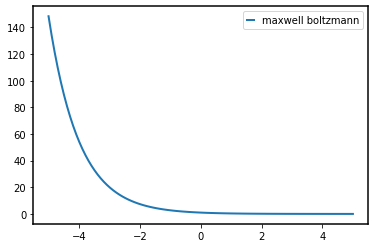

In [16]:
x = np.linspace(-5, 5, 100)
mb_func = maxwell_boltzmann(x)

plt.figure()
plt.plot(x, mb_func, label='maxwell boltzmann')
plt.legend(loc='best')
plt.show()

<a id = 'fermi'></a>

### Fermi-Dirac distribution function

Fermi-Dirac distribution applies to the physics of a system consisting of many identical particles that obey the Pauli exclusion principle. Fermi–Dirac statistics applies to identical and indistinguishable particles with half-integer spin (1/2, 3/2, etc.), called fermions, in thermodynamic equilibrium.

The distribution function is given by:
$$f(E) = \frac{1}{e^{(E-\mu)/k_BT} + 1}$$

where $E$ is the energy state,

$\mu$ is the chemical potential,

$k_B$ is the Boltzmann constant, $1.38 \times 10^{-23} m^2 kg s^{-2} K^{-1}$

$T$ is the temperature (in Kelvins)

In [17]:
def fermi_dirac(x):

    fd = (1./(np.exp(x)+1))

    return fd

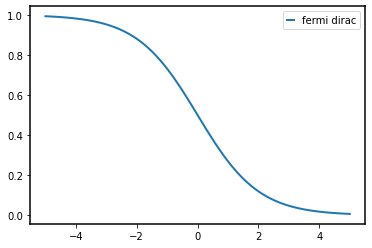

In [18]:
x = np.linspace(-5, 5, 100)
fd_func = fermi_dirac(x)

plt.figure()
plt.plot(x, fd_func, label='fermi dirac')
plt.legend(loc='best')
plt.show()

<a id = 'bose'></a>

### Bose-Einstein distribution function
The Bose–Einstein is a type of quantum statistics that applies only to those particles not limited to single occupancy of the same state, particles have integer values of spin (0, 1, 2 etc.) and are named bosons. There must also be no significant interaction between the particles. These particles are also identical and indistinguishable.

The distribution function is given by:
$$f(E) = \frac{1}{e^{(E-\mu)/k_BT} - 1}$$

where $E$ is the energy state,

$\mu$ is the chemical potential,

$k_B$ is the Boltzmann constant, $1.38 \times 10^{-23} m^2 kg s^{-2} K^{-1}$

$T$ is the temperature (in Kelvins)

In [19]:
def bose_einstein(x):

    bose_result = (1/(np.exp(x)-1))

    return bose_result

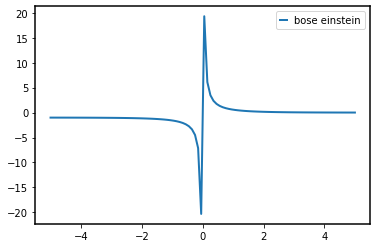

In [20]:
x = np.linspace(-5, 5, 100)
be = bose_einstein(x)

plt.figure()
plt.plot(x, be, label ='bose einstein')
plt.legend(loc='best')
plt.show()

### Plotting all 3 dustribution together

Plot the following functions with energy at different temperatures:

a) Maxwell-Boltzmann distribution

b)Fermi-Dirac distribution 

c) Bose-Einstein distribution 


Define a general function:

$$f(E) = \frac{1}{(exp((E- \mu)/k_BT) +a)}$$

Plot this function for different $E$ and $T$ values.
- $a = 0$ for Maxwell Boltzmann
- $a = +1$ for Fermi Dirac
- $a = -1$ for Bose Einstein

In [21]:
## define the constants

e = 1.6e-19    #electric charge  
k = 1.38e-23    #Boltzmann constant(joule per kelvin)   

In [22]:
 def func(T, u, a):  
    """ This is the general equation,
    for a given chemical potential u,
    with the input variable a=0,
    for Maxwell-Boltxmann distribution;
    input variable a=-1,
    for Bose-Einstein; and
    input variable a=+1,
    for Fermi-Dirac """ 
    
    return 1/((np.exp(((E-u)*e)/(k*T)))+a)

Plots for $\mu = 0$ and energy range \[-0.5, 0.5\] for 4 different temperatures: 100K, 200K, 500K and 700K

In [23]:
E = np.linspace(-0.5, 0.5, 1000)    #energy range 
u1 = 0     #considering chemeical potential of the substance is zero

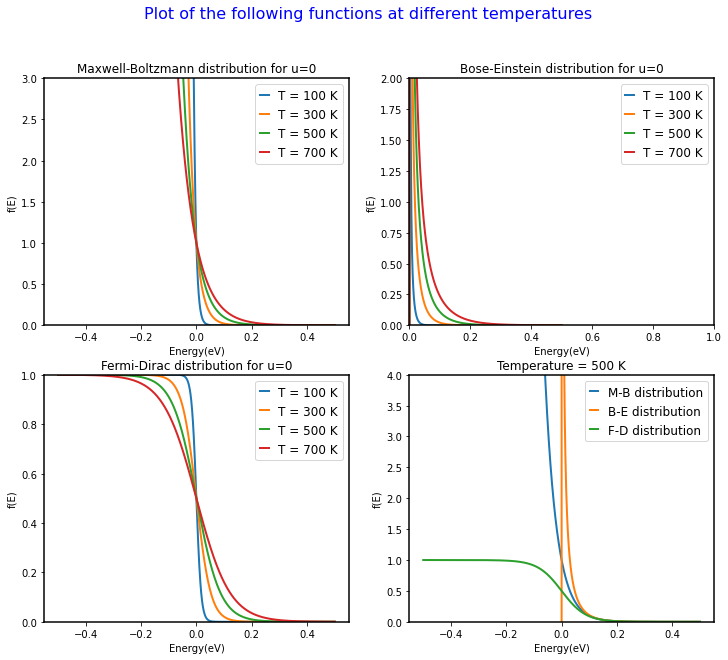

In [24]:
plt.figure(figsize=(12, 10))
 
plt.suptitle('Plot of the following functions at different temperatures', 
             size = 16,color='b')  


plt.subplot(2,2,1)  
plt.plot(E, func(100, u1, 0),label='T = 100 K')  
plt.plot(E, func(300, u1, 0),label='T = 300 K')  
plt.plot(E, func(500, u1, 0),label='T = 500 K')  
plt.plot(E, func(700, u1, 0),label='T = 700 K')  
plt.ylim(0,3)  
plt.xlabel('Energy(eV)')  
plt.ylabel('f(E)')  
plt.legend(loc='best',prop={'size':12})  
plt.title('Maxwell-Boltzmann distribution for u=0')  


plt.subplot(2,2,2)  
plt.plot(E, func(100, u1, -1),label='T = 100 K')  
plt.plot(E, func(300, u1, -1),label='T = 300 K')  
plt.plot(E, func(500, u1, -1),label='T = 500 K')  
plt.plot(E, func(700, u1, -1),label='T = 700 K')  
plt.xlim(0,1)  
plt.ylim(0,2)  
plt.xlabel('Energy(eV)')  
plt.ylabel('f(E)')  
plt.legend(loc='best',prop={'size':12})        
plt.title('Bose-Einstein distribution for u=0')  


plt.subplot(2,2,3)  
plt.plot(E, func(100, u1, +1),label='T = 100 K')  
plt.plot(E, func(300, u1, +1),label='T = 300 K')  
plt.plot(E, func(500, u1, +1),label='T = 500 K')  
plt.plot(E, func(700, u1, +1),label='T = 700 K')  
plt.legend(loc='best',prop={'size':12})  
plt.ylim(0,1)  
plt.xlabel('Energy(eV)')  
plt.ylabel('f(E)')  
plt.title('Fermi-Dirac distribution for u=0') 


plt.subplot(2,2,4)  
plt.plot(E, func(500, u1, 0),label='M-B distribution')  
plt.plot(E, func(500, u1, -1),label='B-E distribution')  
plt.plot(E, func(500, u1, +1),label='F-D distribution')  
plt.legend(loc='best',prop={'size':12})  
plt.ylim(0,4)  
plt.xlabel('Energy(eV)')  
plt.ylabel('f(E)')  
plt.title('Temperature = 500 K')  

plt.show()     

Plots for $\mu = 12$ and energy range \[-2, 2\] for 4 different temperatures: 100K, 200K, 500K and 700K

In [25]:
E = np.linspace(-0.5, 0.5, 1000)    #energy range 
u2 = 0.4    #considering chemeical potential of the substance is zero

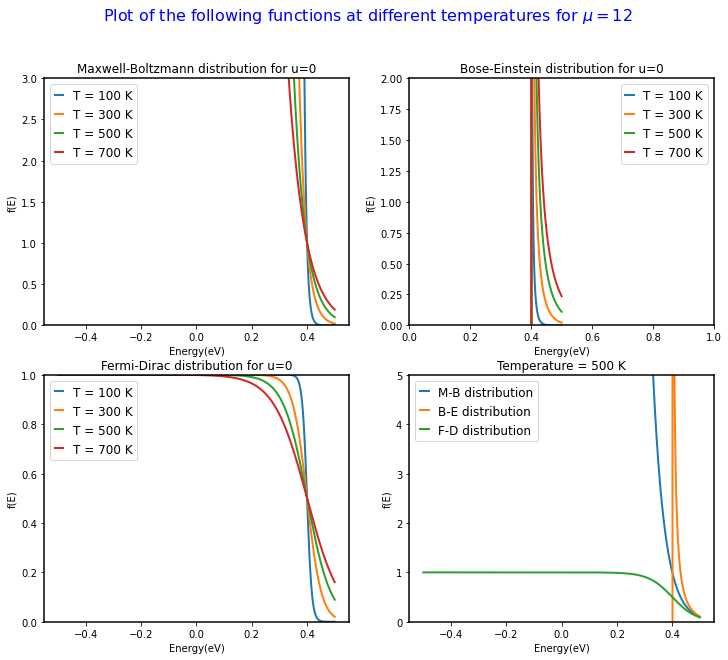

In [26]:
plt.figure(figsize=(12, 10))
 
plt.suptitle('Plot of the following functions at different temperatures for $\mu = 12$', 
             size = 16,color='b')  


plt.subplot(2,2,1)  
plt.plot(E, func(100, u2, 0),label='T = 100 K')  
plt.plot(E, func(300, u2, 0),label='T = 300 K')  
plt.plot(E, func(500, u2, 0),label='T = 500 K')  
plt.plot(E, func(700, u2, 0),label='T = 700 K')  
plt.ylim(0,3)  
plt.xlabel('Energy(eV)')  
plt.ylabel('f(E)')  
plt.legend(loc='best',prop={'size':12})  
plt.title('Maxwell-Boltzmann distribution for u=0')  


plt.subplot(2,2,2)  
plt.plot(E, func(100, u2, -1),label='T = 100 K')  
plt.plot(E, func(300, u2, -1),label='T = 300 K')  
plt.plot(E, func(500, u2, -1),label='T = 500 K')  
plt.plot(E, func(700, u2, -1),label='T = 700 K')  
plt.xlim(0,1)  
plt.ylim(0,2)  
plt.xlabel('Energy(eV)')  
plt.ylabel('f(E)')  
plt.legend(loc='best',prop={'size':12})        
plt.title('Bose-Einstein distribution for u=0')  


plt.subplot(2,2,3)  
plt.plot(E, func(100, u2, +1),label='T = 100 K')  
plt.plot(E, func(300, u2, +1),label='T = 300 K')  
plt.plot(E, func(500, u2, +1),label='T = 500 K')  
plt.plot(E, func(700, u2, +1),label='T = 700 K')  
plt.legend(loc='best',prop={'size':12})  
plt.ylim(0,1)  
plt.xlabel('Energy(eV)')  
plt.ylabel('f(E)')  
plt.title('Fermi-Dirac distribution for u=0') 


plt.subplot(2,2,4)  
plt.plot(E, func(500, u2, 0),label='M-B distribution')  
plt.plot(E, func(500, u2, -1),label='B-E distribution')  
plt.plot(E, func(500, u2, +1),label='F-D distribution')  
plt.legend(loc='best',prop={'size':12})  
plt.ylim(0,5)  
plt.xlabel('Energy(eV)')  
plt.ylabel('f(E)')  
plt.title('Temperature = 500 K')  

plt.show()     

<a id = 'specificheat'></a>

## Specific Heat
- Plot Dulong-Petit law
- Einstein distribution function
- Debye distribution function for high temperature and low temperature and compare them for the two cases.

### Dulong Petit law

Dulong and Petit found that the heat capacity of a mole of many solid elements is about $3N_Ak_B$ (or $3R$), 

where 

$R$ is the universal gas constant, $8.314 JK^{-1}mol^{-1}$,

$N_A$ is the Avogardro's number, $6.023 \times 10^{23}$,

$k_B$ is the Bolzmann constant, $1.38 \times 10^{-23} m^2 kg s^{-2} K^{-1}$


### Einstein distribution function

The speific heat distribution is given by

$$C_{V}=3N_A k_B \left({\varepsilon \over k_BT}\right)^{2}{e^{\varepsilon /k_BT} \over \left(e^{\varepsilon /k_BT}-1\right)^{2}}$$

$$C_{V}=3N_A k_B \left({T_E \over T}\right)^{2}{e^{T_E /T} \over \left(e^{T_E/T}-1\right)^{2}}$$

where

Einstein temperature, $T_E=\varepsilon/k_B = \hbar w/k_B$ and 
$\varepsilon =\hbar \omega$ is the quantum of energy, $\omega$ is the
vibrational frequency of the phonons.

Although the Einstein model of the solid predicts the heat capacity accurately,
in the high temperature limit,

$$\lim _{T\rightarrow \infty }C_{V} = 3N_A k_B $$

### Debye distribution function

Debye distribution function is used to estimate the phonon 
contribution to the specific heat (heat capacity) in a solid.

The Debye model correctly predicts the low temperature dependence of the heat capacity, which is proportional to $T^{3}$ – the Debye $T^3$ law. Just like the Einstein model, it also recovers the Dulong–Petit law at high temperatures.

$$ C_V = 9 N_A k_B \left(\frac{T}{T_D} \right)^3 \int_{0}^{T_D/T} \frac{x^4 e^x}{e^x - 1} dx $$

where $T_D$ is the Debye temperature

Low temperature limit
$$ \lim _{T\rightarrow 0 } C_V  = 12/5 \pi^4 N_A k_B \left( T/T_D \right)^3$$

High temperature limit
$$\lim _{T\rightarrow \infty }C_{V} = 3N_A k_B $$

In [27]:
## define the contants

h = 6.626e-34     # Planck's constant
k = 1.38e-23      # Boltzmann constant
NA = 6.23e23      # Avogadro's number

In [28]:
def dp_law(temp):
    dp = 3*NA*k* np.ones(len(temp))
    return dp

In [29]:
def einstein_dist(temp, te):
    en = 3*NA*k*(te/temp)**2 * (np.exp(te/temp)/(np.exp(te/temp) - 1)**2)
    return en

In [30]:
def debye_dist(temp, td):
    
    debye = np.zeros(len(temp))

    for i, t in enumerate(temp):
        integral = quad(lambda x : x**4*np.exp(x)/(np.exp(x) - 1)**2, 0, (td/t))[0]
        
        debye[i] = 9*NA*k*(t/td)**3*integral
    return debye

In [31]:
# Eintsein and Debye temperatures for solid 1 ()

Te1 = 5          # Einstein temperature, hw/k (either need w or Te)
Td1 = 5          # Debye temperature, hw/k (either need w or Td)

In [32]:
T = np.linspace(0.5, 10, 100)

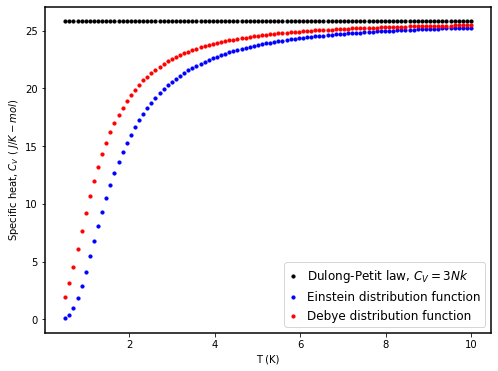

In [33]:
plt.figure(figsize=(8,6))

plt.scatter(T, dp_law(T), label = 'Dulong-Petit law, $C_V = 3Nk$', s = 10, color = 'k')
plt.scatter(T, einstein_dist(T, Te1), label = 'Einstein distribution function', s = 10, color = 'b')
plt.scatter(T, debye_dist(T, Td1), label = 'Debye distribution function', s = 10, color = 'r')
plt.xlabel('T (K)')  
plt.ylabel('Specific heat, $C_V$ $($ $J/K-mol)$')
plt.legend(loc='best',prop={'size':12}) 

In [34]:
# Eintsein and Debye temperatures for solid 1 ()

Te2 = 10         # Einstein temperature, hw/k (either need w or Te)
Td2 = 10          # Debye temperature, hw/k (either need w or Td)

In [35]:
T = np.linspace(0.5, 10, 100)

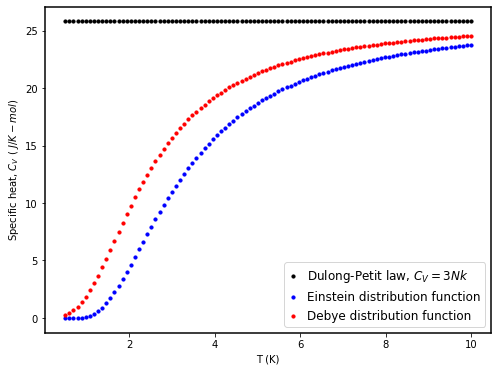

In [36]:
plt.figure(figsize=(8,6))

plt.scatter(T, dp_law(T), label = 'Dulong-Petit law, $C_V = 3Nk$', s = 10, color = 'k')
plt.scatter(T, einstein_dist(T, Te2), label = 'Einstein distribution function', s = 10, color = 'b')
plt.scatter(T, debye_dist(T, Td2), label = 'Debye distribution function', s = 10, color = 'r')
plt.xlabel('T (K)')  
plt.ylabel('Specific heat, $C_V$ $($ $J/K-mol)$')
plt.legend(loc='best',prop={'size':12}) 

### Debye - low and high temperature comparison

At high temperatures, $(T >> T_D, \rightarrow \frac{T_D}{T} << 1)$. So, $C_V = 3N_A k_B$.

At low temperature, $(T << T_D, \rightarrow \frac{T_D}{T} >> 1)$. So, $C_V = \frac{12}{5} \pi^4 N_A k_B \left( \frac{T}{T_D} \right)^3$

In [37]:
def low_debye(temp, td):
    
    debye = 12/5 *(np.pi)**4 *(NA*k) * (temp/td)**3
    
    return debye

In [38]:
def debye_high(temp):
    
    debye = 3*NA*k* np.ones(len(temp))
    
    return debye

In [39]:
T = np.linspace(2, 10, 100)
Td_low = 0.00001               # this is the high temperature range (i.e., Td << T)
Td_high = 100                  # this is the low temperature range (i.e., Td >> T)

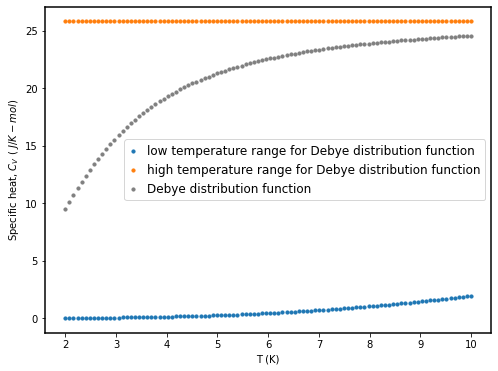

In [40]:
plt.figure(figsize=(8,6))

plt.scatter(T, debye_dist(T, Td_high), 
            label = 'low temperature range for Debye distribution function', s = 10)
plt.scatter(T, debye_dist(T, Td_low), 
            label = 'high temperature range for Debye distribution function', s = 10)
plt.scatter(T, debye_dist(T, Td2), label = 'Debye distribution function', s = 10, color = 'gray')

plt.xlabel('T (K)')  
plt.ylabel('Specific heat, $C_V$ $($ $J/K-mol)$')
plt.legend(loc='best',prop={'size':12}) 

<a id = 'references'></a>

## References:
1. [python numpy](https://numpy.org/doc/stable/reference/index.html)
2. [python matplotlib](https://matplotlib.org/) 
3. [numpy linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
4. [numpy exp](https://numpy.org/doc/stable/reference/generated/numpy.exp.html)
5. [enumerate](https://docs.python.org/3/library/functions.html#enumerate)
6. [scipy quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)
7. [numpy zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)
8. [numpy ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html)